In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
#mouse_drug_data.head()
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
#clinical_data.head()
# Combine the data into a single dataset
combine_data_df = pd.merge(clinical_trial_df,mouse_drug_df,how='outer',on='Mouse ID')

# Display the data table for preview
combine_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_df = combine_data_df.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_response_df = pd.DataFrame(tumor_df)
# Preview DataFrame
tumor_response_df
#tumor_response_df
tumor_response_df =tumor_response_df.reset_index() 
tumor_response_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_df = combine_data_df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
error_df
# Convert to DataFrame
error_df = pd.DataFrame(error_df)
# Preview DataFrame
error_df=error_df.reset_index()
error_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
tumor_response_df = tumor_response_df.reset_index()

# Minor Data Munging to Re-Format the Data Frames
tumor_response_df = tumor_response_df.pivot(index = "Timepoint",columns ="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_response_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:

error_df = error_df.pivot(index = "Timepoint",columns = "Drug")["Tumor Volume (mm3)"]
error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


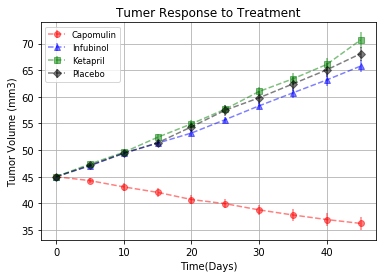

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_response_df.index, tumor_response_df ["Capomulin"],yerr = error_df["Capomulin"],fmt="o",linestyle='dashed', color="r",
            alpha=0.5, label="Capomulin")
plt.errorbar(tumor_response_df.index, tumor_response_df ["Infubinol"],yerr = error_df["Infubinol"],fmt="^",linestyle='dashed', color="blue",
            alpha=0.5, label="Infubinol")
plt.errorbar(tumor_response_df.index, tumor_response_df ["Ketapril"],yerr = error_df["Ketapril"],fmt="s",linestyle='dashed', color="g",
            alpha=0.5, label="Ketapril")
plt.errorbar(tumor_response_df.index, tumor_response_df ["Placebo"],yerr = error_df["Placebo"],fmt="D",linestyle='dashed', color="black",
            alpha=0.5, label="Placebo")

# Set a Title and labels
#ax.set_xlim(0, 46)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Tumer Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
#plt.grid(b=None, which='major', axis='y')
# Save the Figure
plt.savefig("../Images/Tumer Response to Treatment.png")

plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Group_data = combine_data_df.groupby(["Drug","Timepoint"])
Met_data = Group_data["Metastatic Sites"].mean()
Met_data
# Convert to DataFrame
Met_df = pd.DataFrame(Met_data)
# Preview DataFrame
Met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Met_error = Group_data["Metastatic Sites"].sem()
# Convert to DataFrame
Met_data_error = pd.DataFrame(Met_error)
# Preview DataFrame
Met_data_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:

Met_data = Met_df.reset_index()
# Minor Data Munging to Re-Format the Data Frames
Metsite_df = Met_data.pivot(index = 'Timepoint',columns = 'Drug')["Metastatic Sites"]

# Preview that Reformatting worked
Metsite_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
Met_error = Met_data_error.reset_index()
Met_data_error_df = Met_error.pivot(index = 'Timepoint',columns = 'Drug')["Metastatic Sites"]
Met_data_error_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


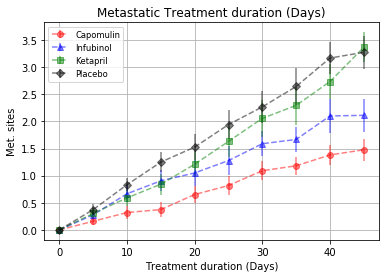

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(Metsite_df.index, Metsite_df ["Capomulin"],yerr = Met_data_error_df["Capomulin"],fmt="o",linestyle='dashed', color="r",
            alpha=0.5, label="Capomulin")
plt.errorbar(Metsite_df.index, Metsite_df ["Infubinol"],yerr = Met_data_error_df["Infubinol"],fmt="^",linestyle='dashed', color="blue",
            alpha=0.5, label="Infubinol")
plt.errorbar(Metsite_df.index, Metsite_df ["Ketapril"],yerr = Met_data_error_df["Ketapril"],fmt="s",linestyle='dashed', color="g",
            alpha=0.5, label="Ketapril")
plt.errorbar(Metsite_df.index, Metsite_df ["Placebo"],yerr = Met_data_error_df["Placebo"],fmt="D",linestyle='dashed', color="black",
            alpha=0.5, label="Placebo")

# Set a Title and labels
#ax.set_xlim(0, 46)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Metastatic Treatment duration (Days)")
plt.xlabel("Treatment duration (Days)")
plt.ylabel("Met. sites")
plt.grid(True)
#plt.grid(b=None, which='major', axis='y')
# Save the Figure
plt.savefig("../Images/Treatment during days.png")

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = combine_data_df.groupby(["Drug","Timepoint"]).count()['Mouse ID']
mice_df
# Convert to DataFrame
mouse_df = pd.DataFrame(mice_df)

# Preview DataFrame

mouse_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_df = mouse_df.reset_index()
#mouse_pivot_df = mice_df.pivot(index = "Timepoint",columns = "Drug")["Mouse count"]
mouse_mung_df = mice_df.pivot(index = 'Timepoint',columns = 'Drug')["Mouse ID"]

# Preview the Data Frame
mouse_mung_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


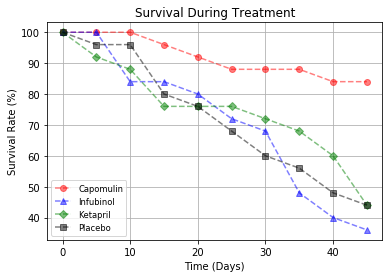

In [16]:
# Generate the Plot (Accounting for percentages)
plt.plot(mouse_mung_df["Capomulin"]/25*100,linestyle='dashed',marker="o", color="r",
            alpha=0.5, label="Capomulin")
plt.plot(mouse_mung_df["Infubinol"]/25*100,linestyle='dashed',marker="^", color="b",
            alpha=0.5, label="Infubinol")
plt.plot(mouse_mung_df["Ketapril"]/25*100,linestyle='dashed',marker="D", color="g",
            alpha=0.5, label="Ketapril")
plt.plot(mouse_mung_df["Placebo"]/25*100,linestyle='dashed',marker="s", color="black",
            alpha=0.5, label="Placebo")


# Set a Title and labels

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True)

# Save the Figure
plt.savefig("../Images/Survival During Treatment.png")



# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
tumor_percentage = (tumor_response_df.iloc[-1]-tumor_response_df.iloc[0])/(tumor_response_df.iloc[0])*100
# Display the data to confirm
tumor_percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

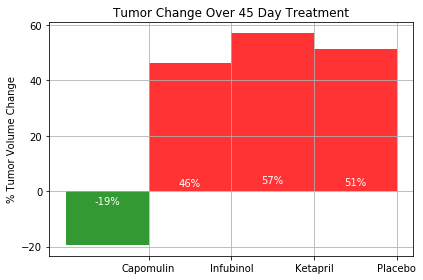

In [18]:
# Store all Relevant Percent Changes into a Tuple
percent_change = [('Capomulin',-19.475303),('Infubinol',46.123472),('Ketapril',57.028795),('Placebo',51.297960)]
percent_change

Drug_tuple = [('Capomulin'),('Infubinol'),('Ketapril'),('Placebo')]
Drug_tuple

# Splice the data between passing and failing drugs
passing=[]
failing=[]
index_passing=[]
index_failing=[]

for i,elements in percent_change:
    if elements > 0:
        passing_drug = elements
        passing.append(elements)
        index_passing.append(i)
    else:
        failing_drug = elements
        failing.append(elements)
        index_failing.append(i)
passing_drugs = list(zip(index_passing,passing))
failing_drugs = list(zip(index_failing,failing))

    
# Orient widths. Add labels, tick marks, etc. 
fig,ax=plt.subplots()
x_axis1 =[0]
x_axis2 =[1,2,3]
y_value1 = [tumor_percentage["Infubinol"], tumor_percentage["Ketapril"], tumor_percentage["Placebo"]]
bar1 = ax.bar(x_axis1,tumor_percentage["Capomulin"],color='g',alpha = 0.8, align="edge",width=-1)
bar2 = ax.bar(x_axis2,y_value1,color='r',alpha=0.8,align="edge",width=-1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])
plt.title("Tumor Change Over 45 Day Treatment")
#plt.xlabel("Time(Days)")
plt.ylabel("% Tumor Volume Change")
plt.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")


# Call functions to implement the function calls
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()

# Save the Figure
plt.savefig("../Images/Tumor change over 45 Day Treatment")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)